In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read the excel file
df = pd.read_csv('../csv_files/comp2_working.csv',index_col=0)
df.head(10)

,X1,X12_abs,X13_abs,X14_abs,X15_abs,X16_abs,X17_abs
1,20000,3913,3102,689,0,0,0
2,120000,2682,1725,2682,3272,3455,3261
3,90000,29239,14027,13559,14331,14948,15549
4,50000,46990,48233,49291,28314,28959,29547
5,50000,8617,5670,35835,20940,19146,19131
6,50000,64400,57069,57608,19394,19619,20024
7,500000,367965,412023,445007,542653,483003,473944
8,100000,11876,380,601,221,159,567
9,140000,11285,14096,12108,12211,11793,3719
10,20000,0,0,0,0,13007,13912


In [5]:
# finding IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

X1         190000.00
X12_abs     63531.25
X13_abs     60971.00
X14_abs     57401.75
X15_abs     52158.50
X16_abs     48353.25
X17_abs     47892.25
dtype: float64


In [6]:
# define upper bound
upper = Q3 + 1.5 * IQR
# define lower bound 
lower = Q1 - 1.5 * IQR
# define outlier variable 
# below is equivalent to this formula: outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outlier = (df < lower) | (df > upper)

# print out the results
# gives the location of the outlier values (indicated by True) based on the bounds defined above 
print(outlier)

          X1  X12_abs  X13_abs  X14_abs  X15_abs  X16_abs  X17_abs
1      False    False    False    False    False    False    False
2      False    False    False    False    False    False    False
3      False    False    False    False    False    False    False
4      False    False    False    False    False    False    False
5      False    False    False    False    False    False    False
6      False    False    False    False    False    False    False
7      False     True     True     True     True     True     True
8      False    False    False    False    False    False    False
9      False    False    False    False    False    False    False
10     False    False    False    False    False    False    False
11     False    False    False    False    False    False    False
12     False    False    False    False    False    False    False
13      True    False    False    False    False    False    False
14     False    False    False    False    False    False    F

In [7]:
# define upper and lower lists
upper = []
lower = []

# create for loop that will iterate over each value in every column
for i in df.columns:
    # define Q1 and Q3 for each column
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    # define IQR for each column
    IQR = Q3 - Q1
    # append empty lists upper and lower
    upper_list = Q3 + 1.5 * IQR
    upper.append(upper_list)
    lower_list = Q1 - 1.5 * IQR
    lower.append(lower_list)

In [8]:
# define the function that will replace outlier values in each column with the appropriate upper or lower limit 
def outlier_handling(x, upper, lower):
    if x > upper:
        x = upper
    elif x < lower:
            x = lower
    else:
        pass
    return x

In [9]:
# apply the outlier handling function to the dfx dataframe to replace the outlier values in each column
for col in df.columns:
    q1 = df.loc[:, col].quantile(0.25)
    q3 = df.loc[:, col].quantile(0.75)
    IQR = q3 - q1
    lbound = q1 - 1.5*IQR
    ubound = q3 + 1.5*IQR
    df.loc[:, col] = df.loc[:, col].apply(lambda x: outlier_handling(x, ubound,lbound))

### Check that IQR Outlier Function Worked by Examing the Boxplots ###

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e1b0fbeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e1b12b588>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e1b0fbd68>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e1b12bc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e1b12bf60>],
 'means': []}

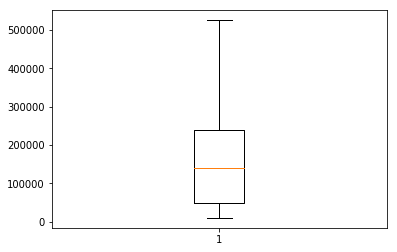

In [10]:
plt.boxplot(df['X1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e1b16b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e1b16be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e1b16b6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e1b176550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e1b176898>],
 'means': []}

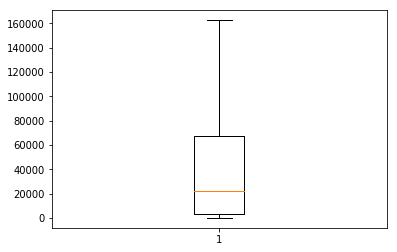

In [11]:
plt.boxplot(df['X12_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e1af05048>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e1af056d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e18e72eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e1af05d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e18e870f0>],
 'means': []}

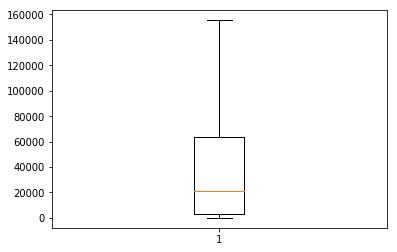

In [12]:
plt.boxplot(df['X13_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e18ddf780>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e18ddfe10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e18ddf630>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e18de94e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e18de9828>],
 'means': []}

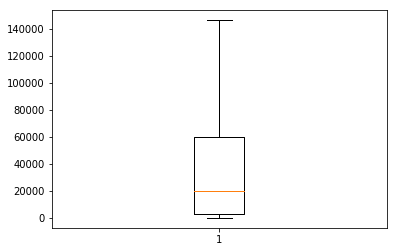

In [13]:
plt.boxplot(df['X14_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e18dbf6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e18dbfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e18dbf550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e18dc8400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e18dc8748>],
 'means': []}

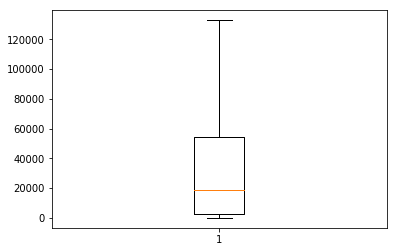

In [14]:
plt.boxplot(df['X15_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e18d9e128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e18d9e7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e18d95f98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e18d9ee48>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e18d291d0>],
 'means': []}

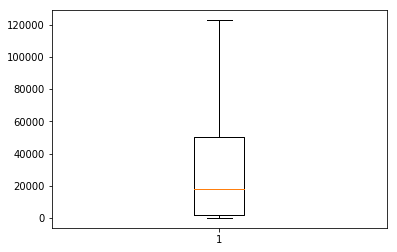

In [15]:
plt.boxplot(df['X16_abs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e1b0c35f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e1b0c3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e1b0c34a8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e18ce36a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e18ce39e8>],
 'means': []}

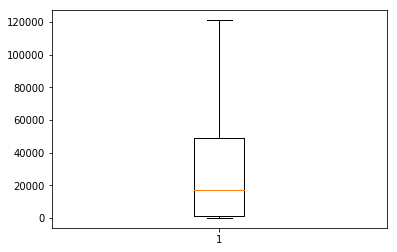

In [16]:
plt.boxplot(df['X17_abs'])

In [18]:
# export new dataframe to csv
df.to_csv('../csv_files/comp2_iqr.csv')